<a href="https://colab.research.google.com/github/simsekergun/Dielectric_Waveguides/blob/main/WG_ModeSolver_Paper_Tidy3D_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of dielectric waveguides with Tidy3D

In [55]:
!pip install tidy3d

In [56]:
# standard python imports
import numpy as np
import matplotlib.pylab as plt

# tidy3D import
import tidy3d as td
from tidy3d.constants import C_0
import tidy3d.web as web
from tidy3d.plugins.mode import ModeSolver

## Example-1

Si3N4 waveguide surrounded by SiO2

In [57]:
# size of simulation domain
Lx, Ly, Lz = 5, 3, 3
dl = 0.05

# waveguide information
wg_width = 1.6
wg_height = 0.7
wg_permittivity = 1.9761**2
bg_permittivity = 1.444**2

# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

# run_time in ps
run_time = 1e-12

# automatic grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl=80, wavelength=wvl_um)


Then we set up a simulation, in this case including a straight waveguide and periodic boundary conditions. Note that Tidy3D warns us that we have not added any sources in our `Simulation` object, however for purposes of mode solving it is not necessary.

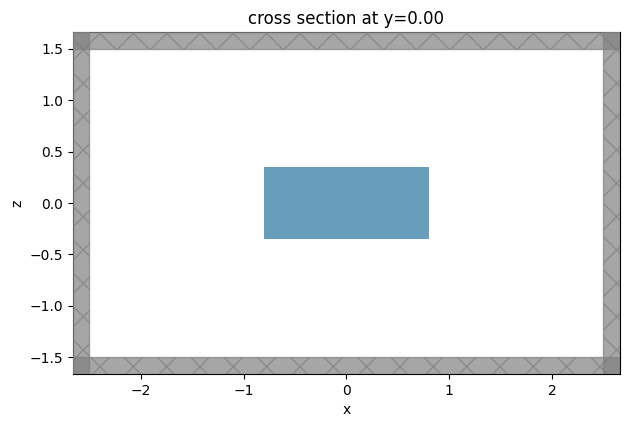

In [58]:
waveguide = td.Structure(
    geometry=td.Box(size=(wg_width, td.inf, wg_height),
                    center=[0, 0, 0]),
    medium=td.Medium(permittivity=wg_permittivity),
)

sim = td.Simulation(
    size=(Lx, Ly, Lz),
    grid_spec=grid_spec,
    medium=td.Medium(permittivity=bg_permittivity),
    structures=[waveguide],
    run_time=run_time,
    #boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
    boundary_spec=td.BoundarySpec(x=td.Boundary.pml(), y=td.Boundary.periodic(),z=td.Boundary.pml()),
)

ax = sim.plot(y=0)
plt.show()


In [59]:
plane = td.Box(center=(0, 0, 0), size=(4, 0, 2))

mode_spec = td.ModeSpec(
    num_modes=4,
    target_neff=1.95,
)
freqs = freq0

mode_solver = ModeSolver(
    simulation=sim,
    plane=plane,
    mode_spec=mode_spec,
    freqs=freqs,
)
mode_data = mode_solver.solve()
mode_data.to_dataframe()

wavelength     n eff  k eff  TE (Ex) fraction  \
f            mode_index                                                  
1.934145e+14 0                 1.55  1.795121    0.0          0.999169   
             1                 1.55  1.754014    0.0          0.003480   
             2                 1.55  1.648527    0.0          0.992587   
             3                 1.55  1.629351    0.0          0.019421   

                         wg TE fraction  wg TM fraction  mode area  
f            mode_index                                             
1.934145e+14 0                 0.952880        0.916548   1.066597  
             1                 0.868232        0.965914   1.358696  
             2                 0.838688        0.925695   1.500698  
             3                 0.890800        0.865566   1.555581

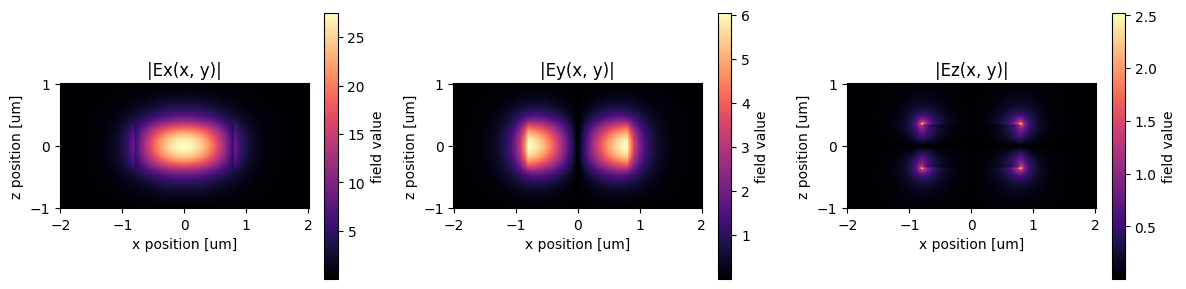

In [60]:
mode_index=0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))
abs(mode_data.Ex.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ey.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax2, cmap="magma")
abs(mode_data.Ez.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax3, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ey(x, y)|")
ax2.set_aspect("equal")
ax3.set_title("|Ez(x, y)|")
ax3.set_aspect("equal")
plt.show()


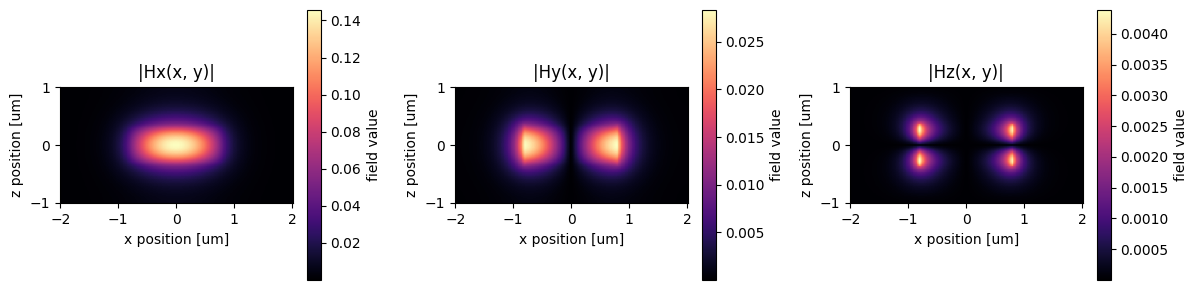

In [61]:
mode_index=1
f, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))
abs(mode_data.Hx.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Hy.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax2, cmap="magma")
abs(mode_data.Hz.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax3, cmap="magma")

ax1.set_title("|Hx(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Hy(x, y)|")
ax2.set_aspect("equal")
ax3.set_title("|Hz(x, y)|")
ax3.set_aspect("equal")
plt.show()

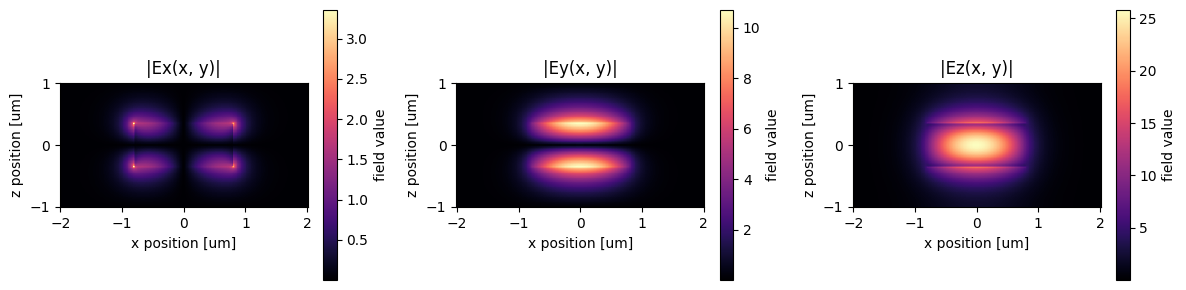

In [62]:
mode_index=1
f, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))
abs(mode_data.Ex.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ey.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax2, cmap="magma")
abs(mode_data.Ez.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax3, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ey(x, y)|")
ax2.set_aspect("equal")
ax3.set_title("|Ez(x, y)|")
ax3.set_aspect("equal")
plt.show()


## Example-2
Waveguide on top a substrate

20:24:41 UTC WARNING: Structure at 'structures[1]' has bounds that extend       
             exactly to simulation edges. This can cause unexpected behavior. If
             intending to extend the structure to infinity along one dimension, 
             use td.inf as a size variable instead to make this explicit.       

             WARNING: Suppressed 2 WARNING messages.                            

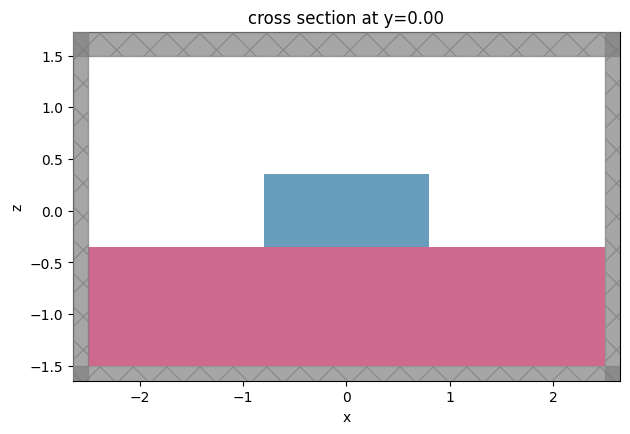

In [63]:
# size of simulation domain
Lx, Ly, Lz = 5, 3, 3
dl = 0.05

# waveguide information
wg_width = 1.6
wg_height = 0.7
wg_permittivity = 1.9761**2
substrate_permittivity = 1.6**2
bg_permittivity = 1.0**2

# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

# run_time in ps
run_time = 1e-12

# automatic grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl=80, wavelength=wvl_um)

waveguide = td.Structure(
    geometry=td.Box(size=(wg_width, td.inf, wg_height),
                    center=[0, 0, 0]),
    medium=td.Medium(permittivity=wg_permittivity),
)

substrate = td.Structure(
    geometry=td.Box(size=(Lx, td.inf, Lz/2-wg_height/2),
                    center=[0, 0, -Lz/2+(Lz/2-wg_height/2)/2]),
    medium=td.Medium(permittivity=substrate_permittivity),
)


sim = td.Simulation(
    size=(Lx, Ly, Lz),
    grid_spec=grid_spec,
    medium=td.Medium(permittivity=bg_permittivity),
    structures=[waveguide, substrate],
    run_time=run_time,
    #boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
    boundary_spec=td.BoundarySpec(x=td.Boundary.pml(), y=td.Boundary.periodic(),z=td.Boundary.pml()),
)

ax = sim.plot(y=0)
plt.show()


In [64]:
plane = td.Box(center=(0, 0, 0), size=(3, 0, 2))

mode_spec = td.ModeSpec(
    num_modes=4,
    target_neff=1.95,
)
freqs = freq0

mode_solver = ModeSolver(
    simulation=sim,
    plane=plane,
    mode_spec=mode_spec,
    freqs=freqs,
)
mode_data = mode_solver.solve()
mode_data.to_dataframe()

wavelength     n eff  k eff  TE (Ex) fraction  \
f            mode_index                                                  
1.934145e+14 0                 1.55  1.785098    0.0          0.998428   
             1                 1.55  1.745296    0.0          0.004173   
             2                 1.55  1.608159    0.0          0.045522   
             3                 1.55  1.607515    0.0          0.952991   

                         wg TE fraction  wg TM fraction  mode area  
f            mode_index                                             
1.934145e+14 0                 0.940076        0.914973   0.998273  
             1                 0.868720        0.961895   1.337661  
             2                 0.895858        0.848478   1.550801  
             3                 0.789381        0.924326   1.450315

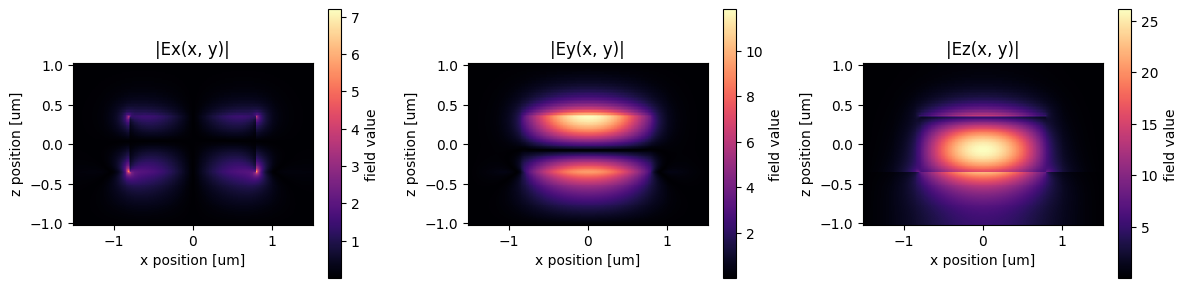

In [65]:
mode_index=1
f, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))
abs(mode_data.Ex.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ey.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax2, cmap="magma")
abs(mode_data.Ez.isel(mode_index=mode_index)).plot(x="x", y="z", ax=ax3, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ey(x, y)|")
ax2.set_aspect("equal")
ax3.set_title("|Ez(x, y)|")
ax3.set_aspect("equal")
plt.show()


20:24:46 UTC WARNING: Structure at 'structures[1]' has bounds that extend       
             exactly to simulation edges. This can cause unexpected behavior. If
             intending to extend the structure to infinity along one dimension, 
             use td.inf as a size variable instead to make this explicit.       

             WARNING: Suppressed 4 WARNING messages.                            

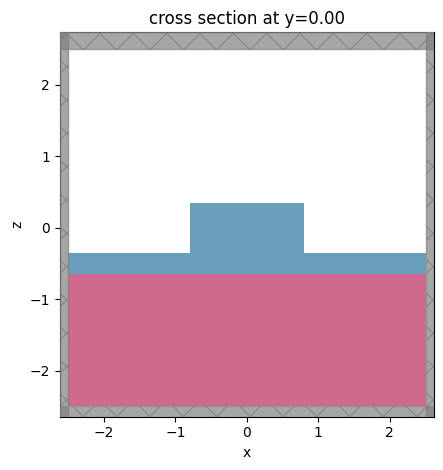

In [66]:
# size of simulation domain
Lx, Ly, Lz = 5, 3, 5
dl = 0.05

# waveguide information
wg_width = 1.6
wg_height = 0.7
film_height = 0.3
wg_permittivity = 1.9761**2
film_permittivity = wg_permittivity
substrate_permittivity = 1.6**2
bg_permittivity = 1.0**2

# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

# run_time in ps
run_time = 1e-12

# automatic grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl=80, wavelength=wvl_um)

waveguide = td.Structure(
    geometry=td.Box(size=(wg_width, td.inf, wg_height),
                    center=[0, 0, 0]),
    medium=td.Medium(permittivity=wg_permittivity),
)

film = td.Structure(
    geometry=td.Box(size=(Lx, td.inf, film_height),
                    center=[0, 0, -film_height/2-wg_height/2]),
    medium=td.Medium(permittivity=film_permittivity),
)

substrate = td.Structure(
    geometry=td.Box(size=(Lx, td.inf, Lz/2-wg_height/2-film_height),
                    center=[0, 0, -Lz/2-film_height/2+(Lz/2-wg_height/2)/2]),
    medium=td.Medium(permittivity=substrate_permittivity),
)


sim = td.Simulation(
    size=(Lx, Ly, Lz),
    grid_spec=grid_spec,
    medium=td.Medium(permittivity=bg_permittivity),
    structures=[waveguide, film, substrate],
    run_time=run_time,
    #boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
    boundary_spec=td.BoundarySpec(x=td.Boundary.pml(), y=td.Boundary.periodic(),z=td.Boundary.pml()),
)

ax = sim.plot(y=0)
plt.show()


In [67]:
plane = td.Box(center=(0, 0, 0), size=(3, 0, 2))

mode_spec = td.ModeSpec(
    num_modes=4,
    target_neff=1.95,
)
freqs = freq0

mode_solver = ModeSolver(
    simulation=sim,
    plane=plane,
    mode_spec=mode_spec,
    freqs=freqs,
)
mode_data = mode_solver.solve()
mode_data.to_dataframe()

wavelength     n eff  k eff  TE (Ex) fraction  \
f            mode_index                                                  
1.934145e+14 0                 1.55  1.840381    0.0          0.997457   
             1                 1.55  1.828221    0.0          0.003911   
             2                 1.55  1.704297    0.0          0.017504   
             3                 1.55  1.698461    0.0          0.980650   

                         wg TE fraction  wg TM fraction  mode area  
f            mode_index                                             
1.934145e+14 0                 0.952311        0.933423   1.242407  
             1                 0.914460        0.965537   1.436571  
             2                 0.928747        0.867531   1.649527  
             3                 0.865183        0.921302   1.895006

##Example-3
Tapered waveguide on a thin-film coated substrate

20:31:45 UTC WARNING: Structure at 'structures[1]' has bounds that extend       
             exactly to simulation edges. This can cause unexpected behavior. If
             intending to extend the structure to infinity along one dimension, 
             use td.inf as a size variable instead to make this explicit.       

             WARNING: Suppressed 4 WARNING messages.                            

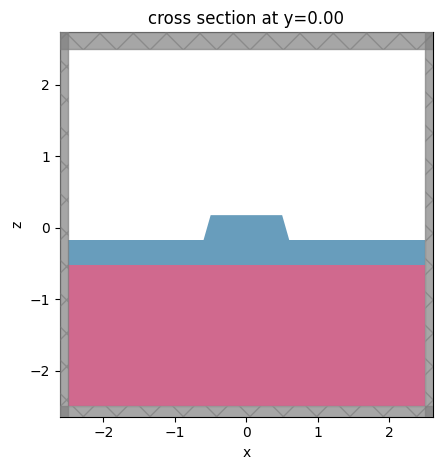

In [73]:
# size of simulation domain
Lx, Ly, Lz = 5, 3, 5
dl = 0.05

# waveguide information
wg_width_bottom = 1.2
wg_width_top = 1.0
wg_height = 0.35
film_height = 0.35

px1 = wg_width_bottom/2
py1 = -wg_height/2
px2 = wg_width_top/2
py2 = wg_height/2
px3 = -px2
py3 = py2
px4 = -px1
py4 = py1

vertices = np.array([(px1,py1), (px2,py2), (px3,py3), (px4, py4)])
tapered_wg = td.PolySlab(vertices=vertices, axis=1, slab_bounds=(-1, 1))


wg_permittivity = 2.1**2
film_permittivity = wg_permittivity
substrate_permittivity = 1.6**2
bg_permittivity = 1.0**2

# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

# run_time in ps
run_time = 1e-12

# automatic grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl=80, wavelength=wvl_um)

waveguide = td.Structure(
    geometry=tapered_wg,
    medium=td.Medium(permittivity=wg_permittivity),
)

film = td.Structure(
    geometry=td.Box(size=(Lx, td.inf, film_height),
                    center=[0, 0, -film_height/2-wg_height/2]),
    medium=td.Medium(permittivity=film_permittivity),
)

substrate = td.Structure(
    geometry=td.Box(size=(Lx, td.inf, Lz/2-wg_height/2-film_height),
                    center=[0, 0, -Lz/2-film_height/2+(Lz/2-wg_height/2)/2]),
    medium=td.Medium(permittivity=substrate_permittivity),
)


sim = td.Simulation(
    size=(Lx, Ly, Lz),
    grid_spec=grid_spec,
    medium=td.Medium(permittivity=bg_permittivity),
    structures=[waveguide, film, substrate],
    run_time=run_time,
    #boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
    boundary_spec=td.BoundarySpec(x=td.Boundary.pml(), y=td.Boundary.periodic(),z=td.Boundary.pml()),
)

ax = sim.plot(y=0)
plt.show()


In [76]:
plane = td.Box(center=(0, 0, 0), size=(2, 0, 2.0))

mode_spec = td.ModeSpec(
    num_modes=4,
    target_neff=1.8,
)
freqs = freq0

mode_solver = ModeSolver(
    simulation=sim,
    plane=plane,
    mode_spec=mode_spec,
    freqs=freqs,
)
mode_data = mode_solver.solve()
mode_data.to_dataframe()

20:33:05 UTC WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

wavelength     n eff  k eff  TE (Ex) fraction  \
f            mode_index                                                  
1.934145e+14 0                 1.55  1.889322    0.0          0.992520   
             1                 1.55  1.834376    0.0          0.048068   
             2                 1.55  1.765082    0.0          0.956797   
             3                 1.55  1.682733    0.0          0.974419   

                         wg TE fraction  wg TM fraction  mode area  
f            mode_index                                             
1.934145e+14 0                 0.959777        0.900058   0.958460  
             1                 0.857834        0.947488   1.067679  
             2                 0.928881        0.875187   1.086858  
             3                 0.873112        0.866500   0.865161